In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Invistico_Airline.csv to Invistico_Airline.csv


In [4]:
df=pd.read_csv('Invistico_Airline.csv')

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


# Exploratory Analysis 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
df[df['Arrival Delay in Minutes'].isnull()].value_counts('Departure Delay in Minutes')

Departure Delay in Minutes
0      147
1       11
4       11
2       10
16       6
      ... 
123      1
125      1
126      1
127      1
76       1
Length: 121, dtype: int64

In [ ]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
##df.dropna(subset=["Arrival Delay in Minutes"], how='all', inplace=True)

In [ ]:
df[df.duplicated()]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


In [ ]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [ ]:
pd.pivot_table(df, index=['satisfaction'],values=['Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support','Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'],  aggfunc=np.sum)

,Baggage handling,Checkin service,Cleanliness,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Online support,Seat comfort
satisfaction,,,,,,,,,,,,,,
dissatisfied,197815,174724,198563,177360,167693,156414,176835,153370,171667,179473,174799,168718,173981,145062
satisfied,282179,259180,282741,211065,283264,214003,211561,286076,250330,273276,275245,266716,283158,223615


In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


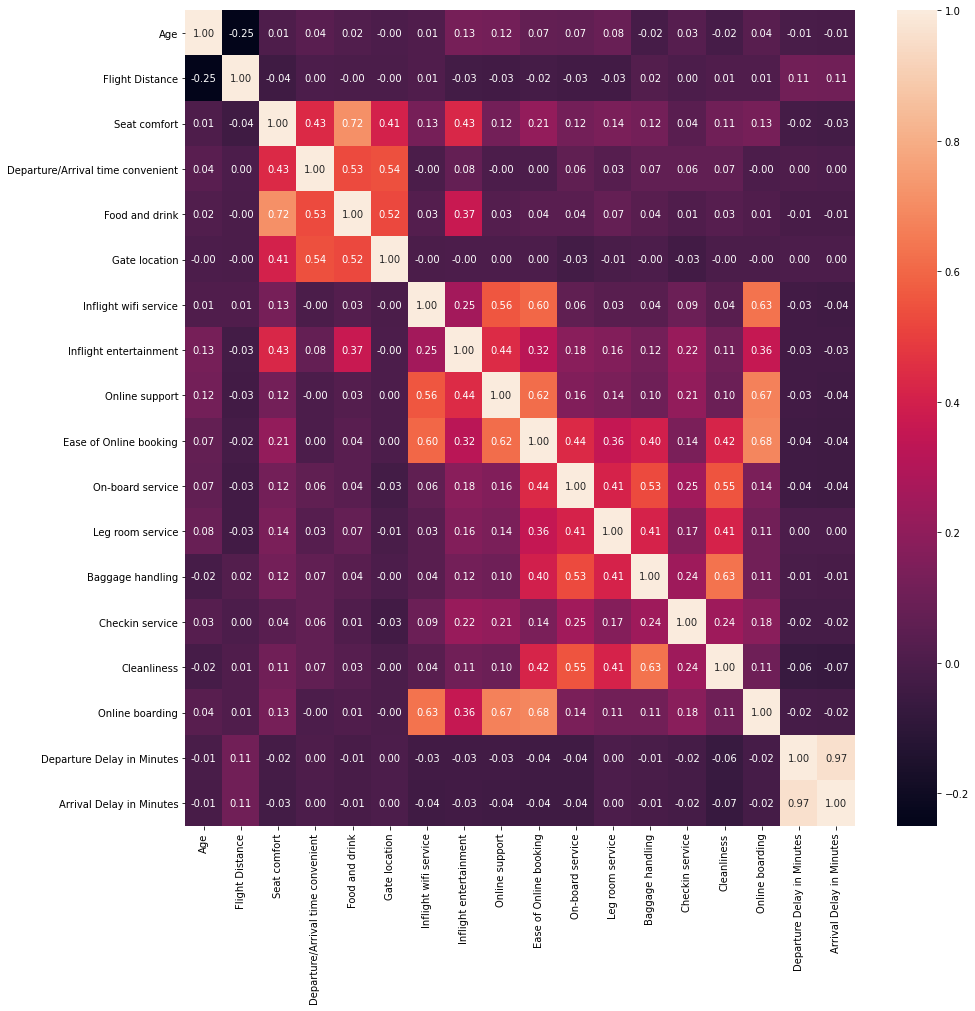

In [ ]:
plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

Dropping the Arival Delay column because due to concerns of colinearity with the departure delay column and due to the arrival delay containing all of out na values

In [5]:
df = df.drop('Arrival Delay in Minutes', axis=1)

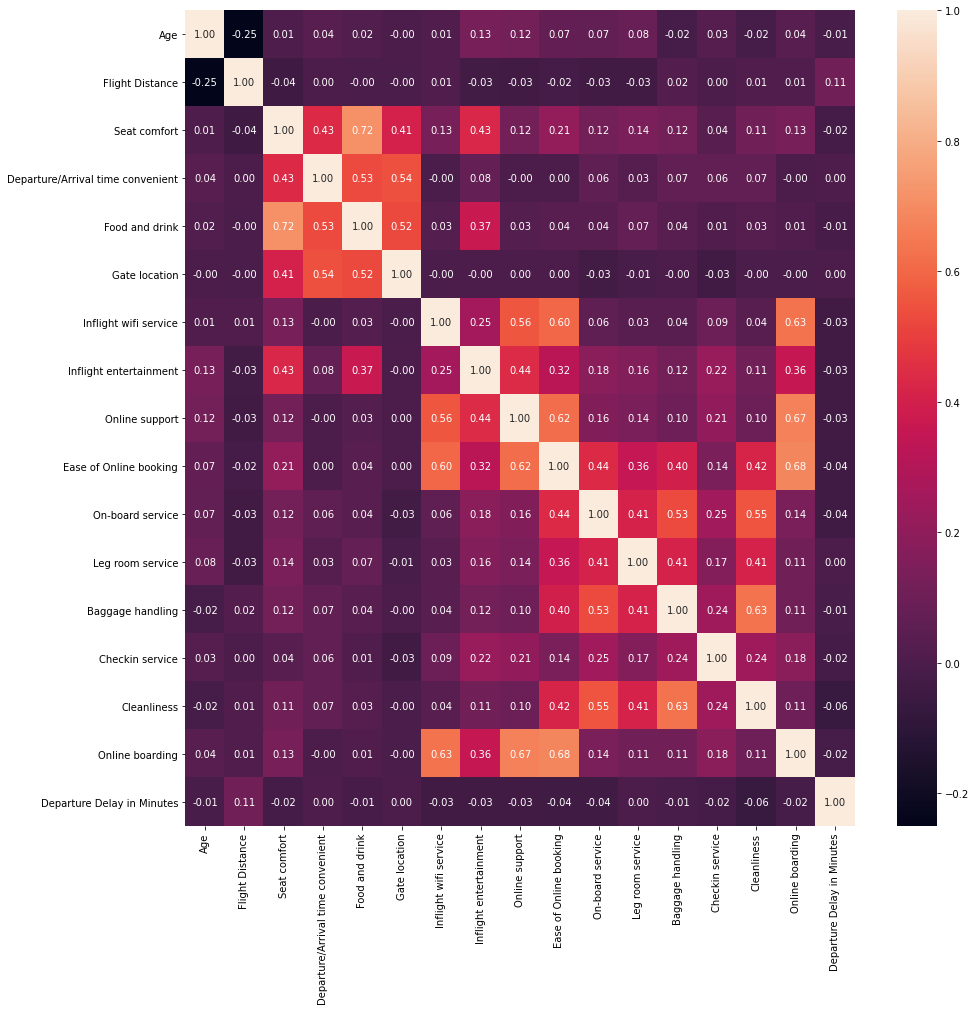

In [6]:
plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

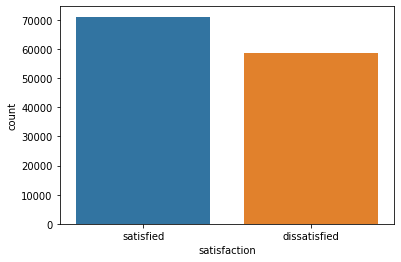

In [ ]:
sns.countplot(x = df['satisfaction'])

Relationship between Variables




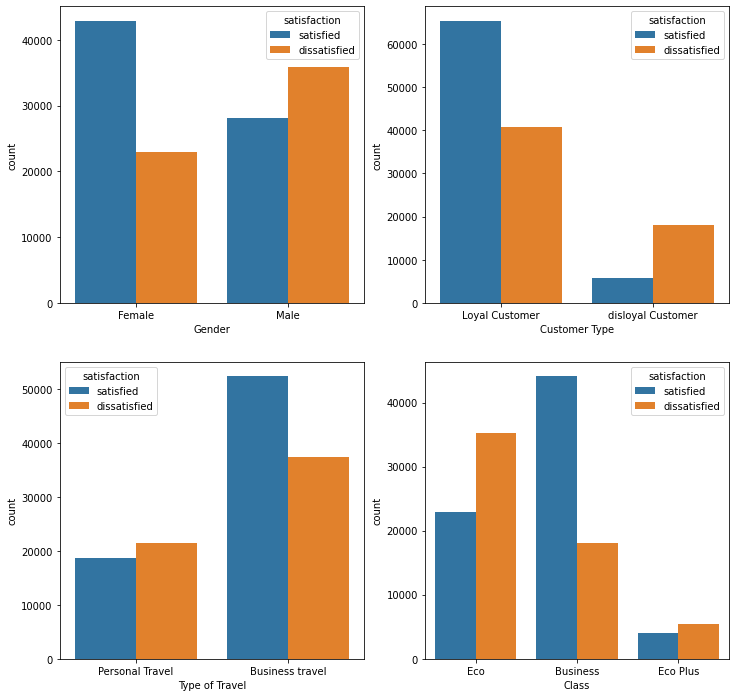

In [ ]:
list=['Gender', 'Customer Type','Type of Travel','Class']
count=0
fig,axes = plt.subplots(2,2,figsize=(12, 12))
for i in range(2):
  for j in range(2):
    sns.countplot(data=df,x=list[count],hue='satisfaction',ax=axes[i][j])
    count+=1

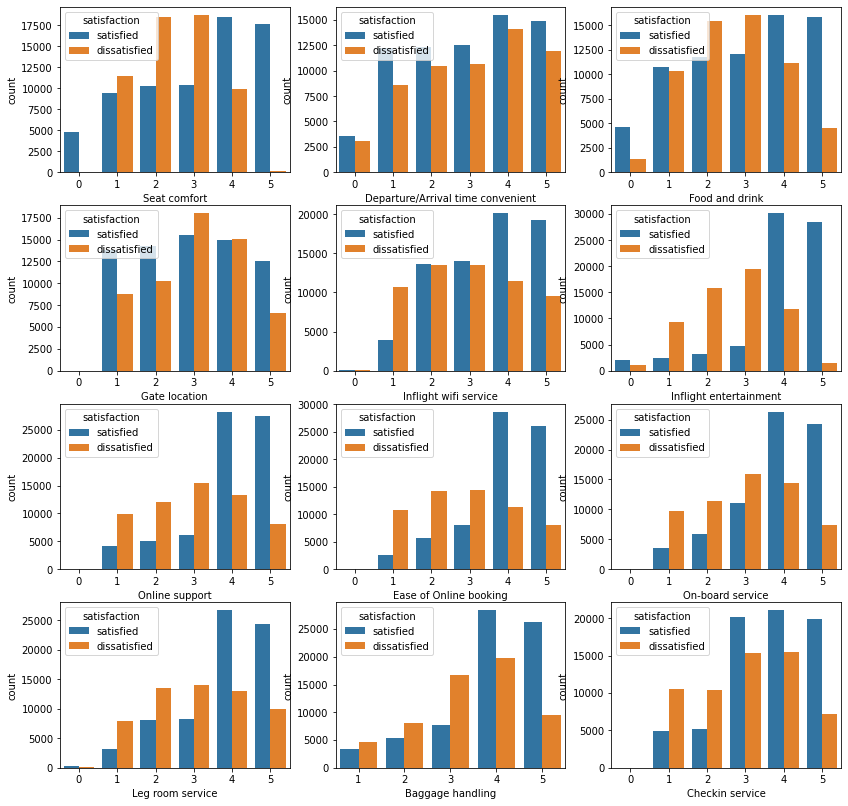

In [ ]:
col=['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
count=0
fig,axes = plt.subplots(4,3,figsize=(14, 14))
for i in range(4):
  for j in range(3):
    sns.countplot(data=df,x=col[count],hue='satisfaction',ax=axes[i][j])
    count+=1

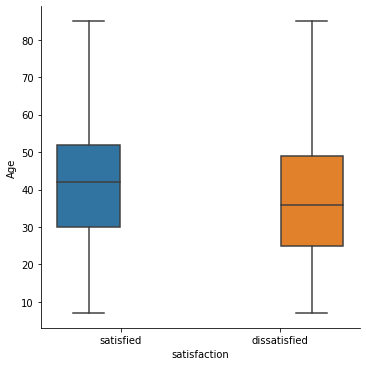

In [ ]:
sns.catplot(x='satisfaction',y='Age',data=df,hue='satisfaction',kind='box')

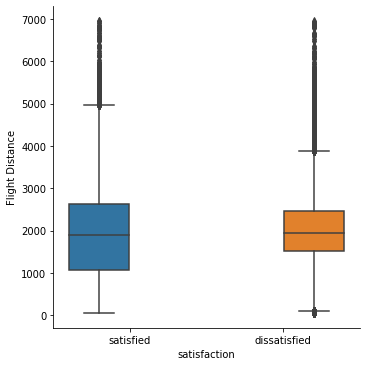

In [ ]:
sns.catplot(x='satisfaction',y='Flight Distance',hue='satisfaction',data=df,kind='box')

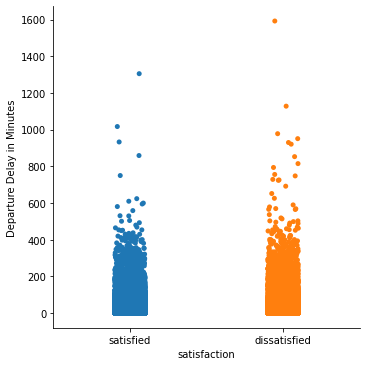

In [14]:
sns.catplot(x='satisfaction',y='Departure Delay in Minutes',data=df,hue='satisfaction')

# Baseline Model *Fitting*

### Data Partitioning

In [ ]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [ ]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], drop_first = True)

In [ ]:
df.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus', 'satisfaction_satisfied'],
      dtype='object')

In [ ]:
predictors = ['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus']
outcome = 'satisfaction_satisfied' # target variable

Defining X and Y

In [ ]:
X = df[predictors]
y = df[outcome]

In [ ]:
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0,0,1,1,0


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90916, 22) (90916,)
Test set: (38964, 22) (38964,)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(X_train, y_train)

print('The intercept is', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X_train.columns).sort_values('coefficient',ascending=False))


The intercept is -4.710567279791432
                                   coefficient
Inflight entertainment                0.685777
On-board service                      0.308633
Checkin service                       0.295515
Seat comfort                          0.294813
Ease of Online booking                0.236175
Leg room service                      0.220531
Online boarding                       0.163458
Gate location                         0.114009
Online support                        0.086543
Baggage handling                      0.085674
Cleanliness                           0.085116
Flight Distance                      -0.000110
Departure Delay in Minutes           -0.005258
Age                                  -0.007896
Inflight wifi service                -0.078302
Departure/Arrival time convenient    -0.197261
Food and drink                       -0.228040
Class_Eco                            -0.735857
Type of Travel_Personal Travel       -0.764135
Class_Eco Plus          

Model Evaluation for Logit

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report 
print('Evaluation Metrics for Training Set')
print("Accuracy:",accuracy_score(y_train, logit.predict(X_train)))
print("precision score: ", precision_score(y_train,logit.predict(X_train)))
print("recall score: ", recall_score(y_train,logit.predict(X_train)))
print("f1-score: ", f1_score(y_train,logit.predict(X_train)))

Evaluation Metrics for Training Set
Accuracy: 0.8369703902503409
precision score:  0.8504124619573923
recall score:  0.8524606615285806
f1-score:  0.8514353299655201


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report 
print('Evaluation Metrics for Test Set')
print("Accuracy:",accuracy_score(y_test, logit.predict(X_test)))
print("precision score: ", precision_score(y_test,logit.predict(X_test)))
print("recall score: ", recall_score(y_test,logit.predict(X_test)))
print("f1-score: ", f1_score(y_test,logit.predict(X_test)))

Evaluation Metrics for Test Set
Accuracy: 0.8318704445128837
precision score:  0.8450281425891182
recall score:  0.8472934204956968
f1-score:  0.8461592654345631


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_importances = dt.feature_importances_
dt_df = pd.DataFrame({'feature': X_train.columns, 'importance': dt_importances})
dt_df = dt_df.sort_values('importance', ascending = False)
print(dt_df)

                              feature  importance
7              Inflight entertainment    0.639960
2                        Seat comfort    0.232178
9              Ease of Online booking    0.071711
8                      Online support    0.015231
18    Customer Type_disloyal Customer    0.013521
10                   On-board service    0.009760
11                   Leg room service    0.008107
5                       Gate location    0.005491
19     Type of Travel_Personal Travel    0.004041
14                        Cleanliness    0.000000
20                          Class_Eco    0.000000
17                        Gender_Male    0.000000
16         Departure Delay in Minutes    0.000000
15                    Online boarding    0.000000
0                                 Age    0.000000
13                    Checkin service    0.000000
12                   Baggage handling    0.000000
1                     Flight Distance    0.000000
6               Inflight wifi service    0.000000


In [ ]:
pip install dmba

     |████████████████████████████████| 11.8MB 6.0MB/s 


no display found. Using non-interactive Agg backend


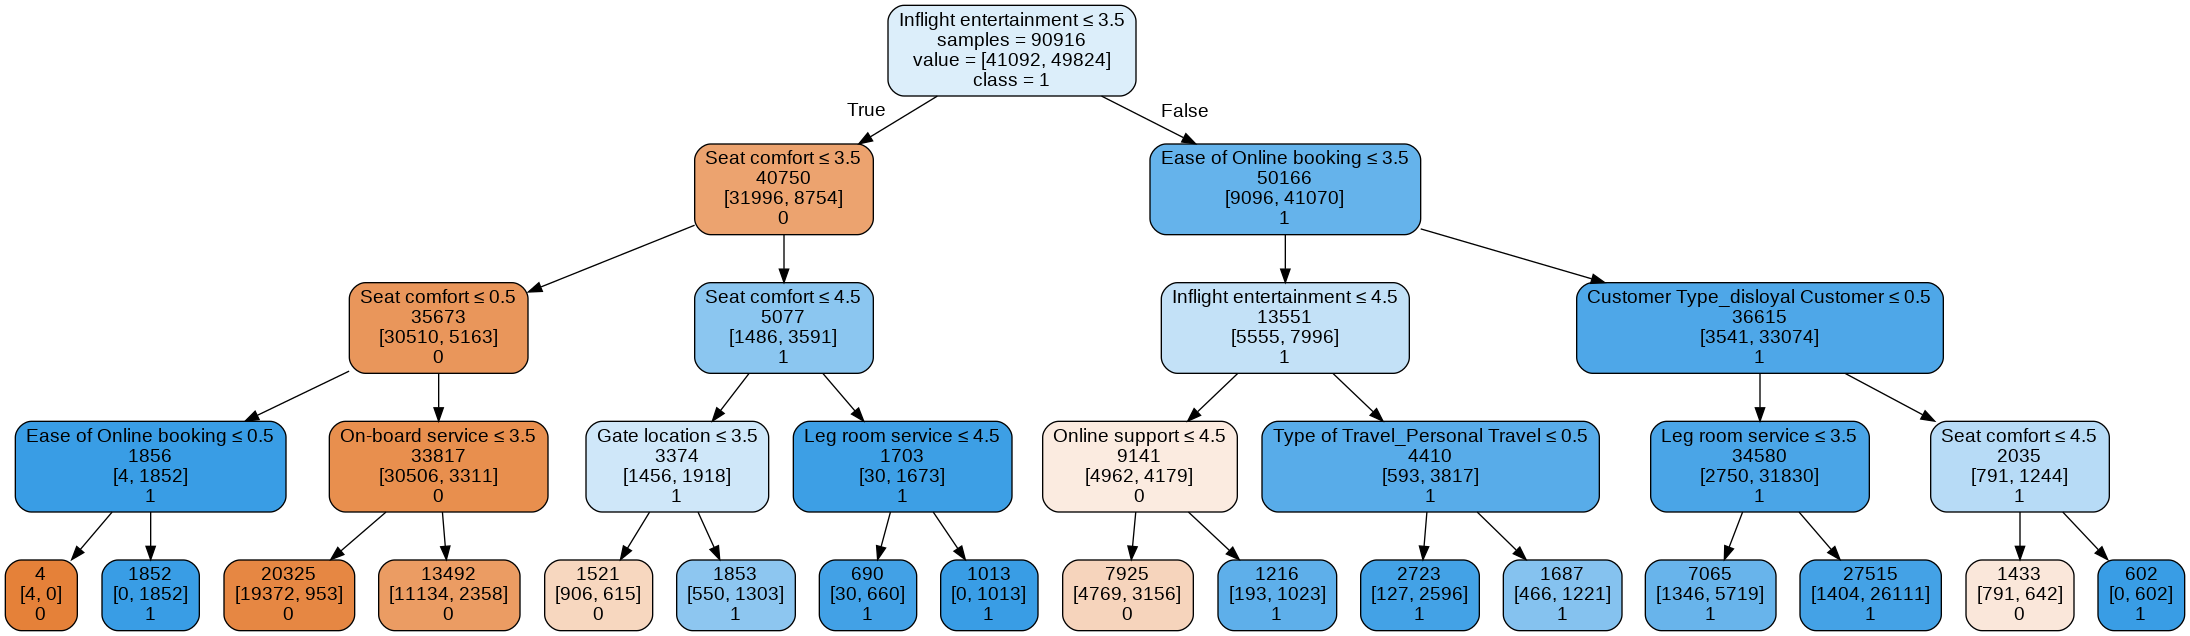

In [ ]:
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

plotDecisionTree(dt, feature_names=X_train.columns, class_names=dt.classes_)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report 
print('Evaluation Metrics for Training Set')
print("Accuracy:",accuracy_score(y_train, dt.predict(X_train)))
print("precision score: ", precision_score(y_train,dt.predict(X_train)))
print("recall score: ", recall_score(y_train,dt.predict(X_train)))
print("f1-score: ", f1_score(y_train,dt.predict(X_train)))

Evaluation Metrics for Training Set
Accuracy: 0.8697698974877909
precision score:  0.9109399342219144
recall score:  0.8449743095696853
f1-score:  0.8767180341524364


In [ ]:
print('Evaluation Metrics for Test Set')
print("Accuracy:",accuracy_score(y_test, dt.predict(X_test)))
print("precision score: ", precision_score(y_test,dt.predict(X_test)))
print("recall score: ", recall_score(y_test,dt.predict(X_test)))
print("f1-score: ", f1_score(y_test,dt.predict(X_test)))

Evaluation Metrics for Test Set
Accuracy: 0.8669797762036752
precision score:  0.9094937353570337
recall score:  0.8398156421953629
f1-score:  0.873266987798616


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# run naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# predict probabilities
predProb_train = nb.predict_proba(X_train)
predProb_test = nb.predict_proba(X_test)

# predict class membership
y_test_pred = nb.predict(X_test)
y_train_pred = nb.predict(X_train)

In [ ]:
from dmba import classificationSummary

# training
classificationSummary(y_train, nb.predict(X_train))

#accuracy of model for training set
print('\nAccuracy on train is', round(accuracy_score(y_train,y_train_pred),2))
print('Precision score on train is', round(precision_score(y_train,y_train_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_train,y_train_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_train,y_train_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.8164)

       Prediction
Actual     0     1
     0 32445  8533
     1  8107 41555

Accuracy on train is 0.82
Precision score on train is 0.83
Recall score on train is 0.84
F1 score on train is 0.83


In [ ]:
# validation set
classificationSummary(y_test, nb.predict(X_test))

#accuracy of model for validation set
print('\nAccuracy on train is', round(accuracy_score(y_test,y_test_pred),2))
print('Precision score on train is', round(precision_score(y_test,y_test_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_test,y_test_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_test,y_test_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.8177)

       Prediction
Actual     0     1
     0 13993  3634
     1  3446 17774

Accuracy on train is 0.82
Precision score on train is 0.83
Recall score on train is 0.84
F1 score on train is 0.83


In [ ]:
NB_varimportance_0 = pd.DataFrame({'attribute': X_train.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
1,Flight Distance,2025.840915
0,Age,37.479379
17,Arrival Delay in Minutes,18.708575
16,Departure Delay in Minutes,17.930402
14,Cleanliness,3.378081
12,Baggage handling,3.363683
11,Leg room service,3.049417
3,Departure/Arrival time convenient,3.017814
5,Gate location,3.006052
10,On-board service,2.971058


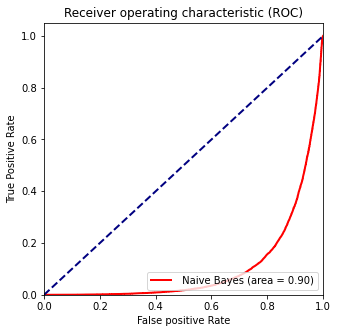

In [ ]:
from sklearn.metrics import roc_curve,auc
from matplotlib import pyplot as plt


def roc_graph(nb,y_test,X_test):
    fpr,tpr, _ = roc_curve(y_test,nb.predict_proba(X_test)[:,1],pos_label = 1)
    roc_auc = auc(fpr,tpr)
    
    plt.figure(figsize=[5,5])
    plt.plot(tpr,fpr,color='red',
            lw=2, label=' Naive Bayes (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
    
roc_graph(nb,y_test,X_test)

PCA (based on decision tree)

The most important attributes from decision tree is: 'Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support'

In [ ]:
from sklearn.decomposition import PCA
pcs = PCA(n_components=5)
pcs.fit(df[['Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5
Standard deviation,1.9913,1.3848,1.2098,0.9788,0.6877
Proportion of variance,0.4517,0.2185,0.1668,0.1092,0.0539
Cumulative proportion,0.4517,0.6702,0.8370,0.9461,1.0000


In [ ]:
dt_predictors = ['Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support']
dt_outcome = 'satisfaction_satisfied' # target variable

In [ ]:
dt_X = df[dt_predictors]
dt_y = df[dt_outcome]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( dt_X, dt_y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90640, 5) (90640,)
Test set: (38847, 5) (38847,)


In [ ]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_
dt_df = pd.DataFrame({'feature': X_train.columns, 'importance': dt_importances})
dt_df = dt_df.sort_values('importance', ascending = False)
print(dt_df)

                  feature  importance
0  Inflight entertainment    0.658220
1            Seat comfort    0.228793
2  Ease of Online booking    0.073681
3        On-board service    0.022981
4          Online support    0.016324


**Accuracy of the model with ONLY the most important attributes**

In [ ]:
print("Accuracy:",accuracy_score(y_test, dt.predict(X_test)))
print("precision score: ", precision_score(y_test,dt.predict(X_test)))
print("recall score: ", recall_score(y_test,dt.predict(X_test)))
print("f1-score: ", f1_score(y_test,dt.predict(X_test)))

Accuracy: 0.863258424073931
precision score:  0.8953673327368525
recall score:  0.8488689915174363
f1-score:  0.8714983792152499


In [ ]:
scores = pd.DataFrame(pcs.transform(df[['Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support']]), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores.head()

,PC1,PC2,PC3,PC4,PC5
0,1.906804,1.097482,-0.500649,-1.998864,-1.449300
1,2.590156,2.076728,0.779292,-0.888678,-0.610643
2,4.422628,2.044754,0.444495,0.441796,0.260432
3,3.086905,0.013805,-2.677880,-2.042999,-0.149023
4,2.265977,1.353690,-2.102958,-1.095146,0.400362


**USE PC SCORES TO RUN MODEL**

In [ ]:
dt_predictors = ['PC1','PC2','PC3','PC4']
dt_outcome = 'satisfaction_satisfied' # target variable

In [ ]:
dt_X = scores[dt_predictors]
dt_y = df[dt_outcome]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( dt_X, dt_y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90640, 4) (90640,)
Test set: (38847, 4) (38847,)


In [ ]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_
dt_df = pd.DataFrame({'feature': X_train.columns, 'importance': dt_importances})
dt_df = dt_df.sort_values('importance', ascending = False)
print(dt_df)

  feature  importance
0     PC1    0.715523
3     PC4    0.144353
1     PC2    0.130532
2     PC3    0.009592


In [ ]:
print("Accuracy:",accuracy_score(y_test, dt.predict(X_test)))
print("precision score: ", precision_score(y_test,dt.predict(X_test)))
print("recall score: ", recall_score(y_test,dt.predict(X_test)))
print("f1-score: ", f1_score(y_test,dt.predict(X_test)))

Accuracy: 0.829175998146575
precision score:  0.8337910830357961
recall score:  0.8583883129123469
f1-score:  0.8459109274137371


**PCA (based on logistic)**

The most important attributes from logistic regression: 'Customer Type_disloval Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel','Inflight entertainment'.


In [ ]:
l_predictors = ['Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel','Inflight entertainment']
l_outcome = 'satisfaction_satisfied' # target variable

In [ ]:
l_X = df[l_predictors]
l_y = df[l_outcome]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( l_X, l_y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90640, 5) (90640,)
Test set: (38847, 5) (38847,)


In [ ]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(lX_train, ly_train)

print('The intercept is', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X_train.columns).sort_values('coefficient',ascending=False))

NameError: ignored

**Accuracy of the model with ONLY the most important attributes**

In [ ]:
print("Accuracy:",accuracy_score(y_test, logit.predict(X_test)))
print("precision score: ", precision_score(y_test,logit.predict(X_test)))
print("recall score: ", recall_score(y_test,logit.predict(X_test)))
print("f1-score: ", f1_score(y_test,logit.predict(X_test)))

In [ ]:
pcs = PCA(n_components=5)
pcs.fit(df[['Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel','Inflight entertainment']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary.round(4)

**USE PC SCORES TO RUN MODEL**

In [ ]:
ll_predictors = ['PC1','PC2','PC3','PC4']
ll_outcome = 'satisfaction_satisfied' # target variable

In [ ]:
ll_X = scores[ll_predictors]
ll_y = df[ll_outcome]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( ll_X, ll_y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(X_train, y_train)

In [ ]:
print("Accuracy:",accuracy_score(y_test, logit.predict(X_test)))
print("precision score: ", precision_score(y_test,logit.predict(X_test)))
print("recall score: ", recall_score(y_test,logit.predict(X_test)))
print("f1-score: ", f1_score(y_test,logit.predict(X_test)))

PCA (based on nb)


The most important attributes from nb: 'Flight Distance','Age','Arrival Delay in Minutes','Departure Delay in Minutes','Cleanliness'.

In [ ]:
n_predictors = ['Flight Distance','Age','Arrival Delay in Minutes','Departure Delay in Minutes','Cleanliness']
n_outcome = 'satisfaction_satisfied' # target variable

In [ ]:
n_X = df[n_predictors]
n_y = df[n_outcome]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( n_X, n_y, test_size=0.3, random_state=4)


In [ ]:
nb.fit(X_train, y_train)

In [ ]:
predProb_train = nb.predict_proba(X_train)
predProb_test = nb.predict_proba(X_test)

# predict class membership
y_test_pred = nb.predict(X_test)
y_train_pred = nb.predict(X_train)

**Accuracy of the model with ONLY the most important attributes**

In [ ]:
classificationSummary(y_test, nb.predict(X_test))

#accuracy of model for validation set
print('\nAccuracy on train is', round(accuracy_score(y_test,y_test_pred),2))
print('Precision score on train is', round(precision_score(y_test,y_test_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_test,y_test_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_test,y_test_pred, pos_label = 1),2))

In [ ]:
pcs = PCA(n_components=5)
pcs.fit(df[['Flight Distance','Age','Arrival Delay in Minutes','Departure Delay in Minutes','Cleanliness']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5']
pcsSummary.round(4)

**USE PC SCORES TO RUN MODEL**

In [ ]:
nn_predictors = ['PC1','PC2']
nn_outcome = 'satisfaction_satisfied' # target variable

In [ ]:
nn_X = scores[nn_predictors]
nn_y = df[nn_outcome]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( nn_X, nn_y, test_size=0.3, random_state=4)

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
predProb_train = nb.predict_proba(X_train)
predProb_test = nb.predict_proba(X_test)

# predict class membership
y_test_pred = nb.predict(X_test)
y_train_pred = nb.predict(X_train)

In [ ]:
classificationSummary(y_test, nb.predict(X_test))

#accuracy of model for validation set
print('\nAccuracy on train is', round(accuracy_score(y_test,y_test_pred),2))
print('Precision score on train is', round(precision_score(y_test,y_test_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(y_test,y_test_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(y_test,y_test_pred, pos_label = 1),2))

PCA for all importance attributes


In [ ]:
pcs = PCA(n_components=14)
pcs.fit(df[['Flight Distance','Age','Arrival Delay in Minutes','Departure Delay in Minutes','Cleanliness','Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support','Customer Type_disloyal Customer','Gender_Male','Class_Eco Plus','Type of Travel_Personal Travel']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
pcsSummary.round(4)

**Model Builing**

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

 We build three models (Logistic Regression, Decision Tree and Naive Bayes) above for our airline analysis. Among those three, Decision Tree has a hightest accuracy of 86.6% while Naive Bayes has a lowest accuracy of 82%. In addition, Decision Tree has a overall high precision score, recall score. Therefore, Decision Tree is the best model to predict customers' satisfaction.  

Since we find out the most important attributes from decision tree are as following: 'Inflight entertainment', 'Seat comfort', 'Ease of Online booking','On-board service', 'Online support'. We will set them as our predictors for the model.

In [ ]:
predictorsnew = ['Seat comfort', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service']
outcome = 'satisfaction_satisfied'

In [ ]:
X=df[predictorsnew]
y=df[outcome]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
pip install dmba

In [ ]:
X=df[predictorsnew]
y=df[outcome]
dt.fit(X_train, y_train)
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

plotDecisionTree(dt, feature_names=predictorsnew, class_names=dt.classes_)

NameError: ignored